In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import pandas as pd
import ruptures as rpt
import csv
import glob
from scipy import signal
import plotly.express as px
%matplotlib notebook

<IPython.core.display.Javascript object>


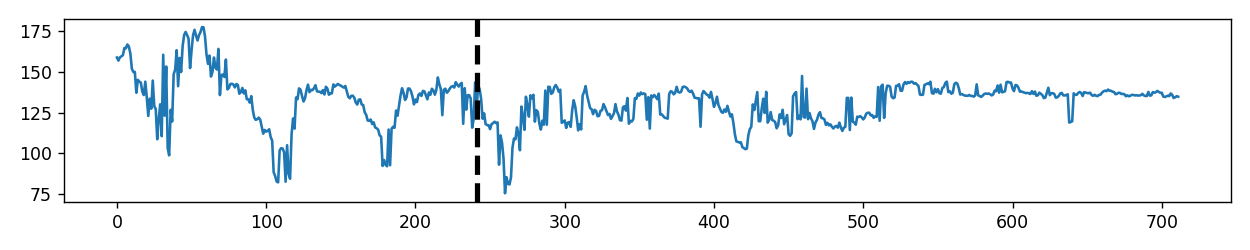

<IPython.core.display.Javascript object>


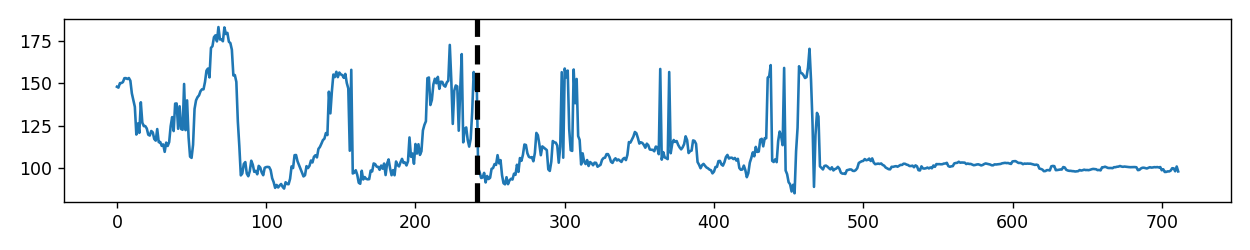

<IPython.core.display.Javascript object>


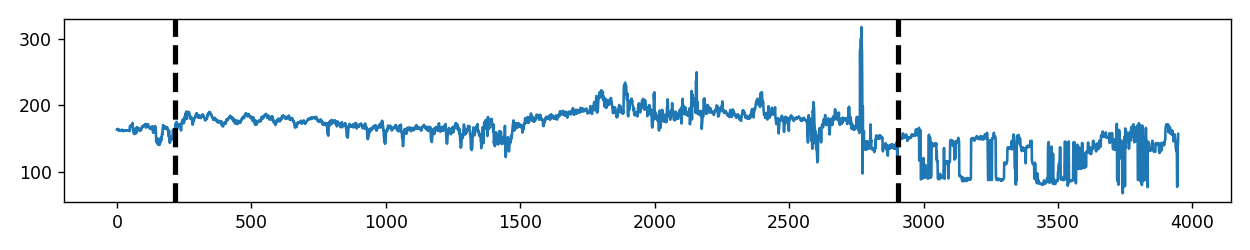

<IPython.core.display.Javascript object>


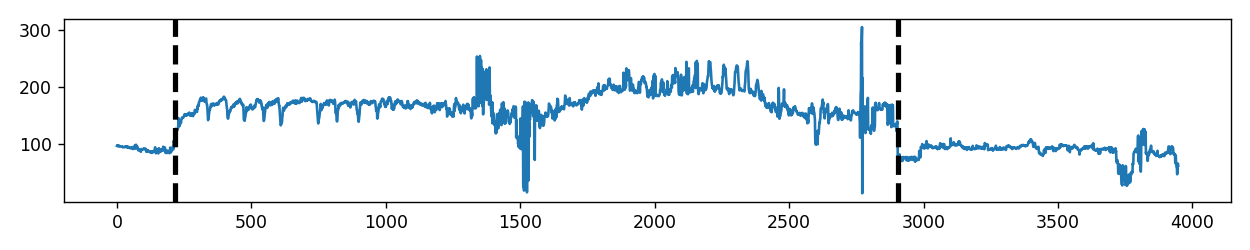

KeyError: 'left_knee_angle'

In [8]:
al = []
for file in files:    
    df = pd.read_csv(file)
    lka = np.array(df['left_knee_angle'])
    rka = np.array(df['right_knee_angle'])
    ts = np.array(df['timestamp'])
    df = pd.get_dummies(df["label"]).drop(['sitting'], axis=1)
    test = np.array(df['standing'])
    algo = rpt.KernelCPD(kernel = 'linear', min_size=150).fit(test)
    result = algo.predict(pen = 25)
    rpt.display(lka, [], result)
    rpt.display(rka, [], result)
    plt.show()
    del result[-1]
    al.append(result)

In [ ]:
al[1][1] = 85*30  

In [ ]:
al #breakpoints from video data (frame no.)

In [ ]:
file = files[1]
file

In [2]:
#incase of video data we need first sit/stand to last stand/sit
path = 'D:\LifeSpark Technology\Gait Data\PMM June 2021 Gait Data\Monday\\5)Anil Kulkarni(10 am)'

In [3]:
#IMU_data
r1 = pd.read_csv(os.path.join(path,'1R TIME 12.6.csv'), index_col = False)
l1 = pd.read_csv(os.path.join(path,'1L TIME 12.6.csv'), index_col = False)
#r2 = pd.read_csv(os.path.join(path,'2R TIME 11.34.csv'), index_col = False)
#l2 = pd.read_csv(os.path.join(path,'2L TIME 11.34.csv'), index_col = False)

C:\Users\Yash Vardhan Agarwal\AppData\Local\Temp\ipykernel_3840\979774616.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  l1 = pd.read_csv(os.path.join(path,'1L TIME 12.6.csv'), index_col = False)


<IPython.core.display.Javascript object>


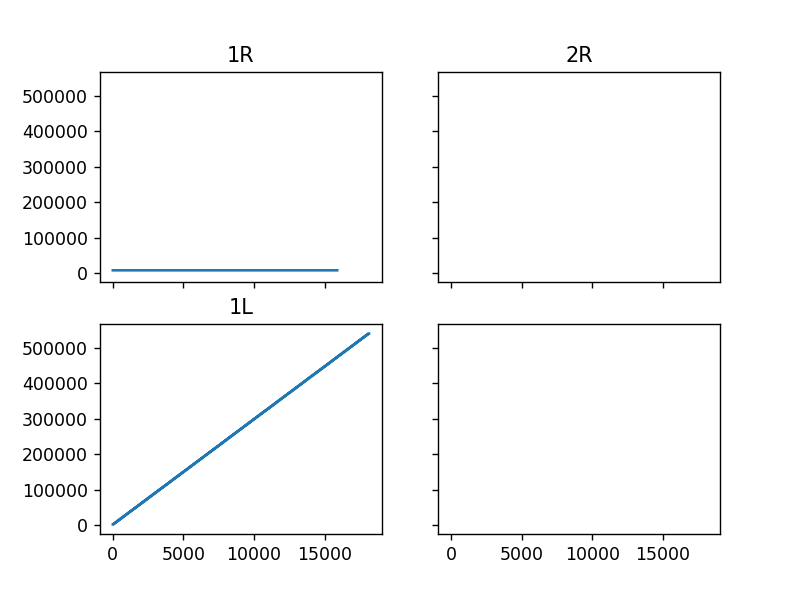

NameError: name 'r2' is not defined

In [4]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
# fig.add_subplot(221)
ax[0,0].set_title('1R')
ax[0,0].plot(r1['t'])
# fig.add_subplot(222)
ax[1,0].set_title('1L')
ax[1,0].plot(l1['t'])
# fig.add_subplot(223)
ax[0,1].set_title('2R')
ax[0,1].plot(r2['t'])
# fig.add_subplot(224)
ax[1,1].set_title('2L')
ax[1,1].plot(l2['t'])

In [24]:
fs_1L = np.mean(np.diff(l1['t'][2:5000]))
fs_1L

29.594274564738843

In [6]:
l1

,t,ax,ay,az,root_a,gx,gy,gz,mx,my,mz,mdir,recording,connected
0,2394.28,-9.75,-0.78,-0.94,-1.0,-0.01,-0.04,0.00,-4.5,61.05,18.45,0.0,0.65,1
1,2394.28,-9.90,-0.81,-0.96,-1.0,0.02,-0.05,0.02,-4.5,61.05,18.45,0.0,0.65,1
2,2394.28,-9.73,-0.76,-1.09,-1.0,0.02,-0.05,0.02,-4.5,61.05,18.45,0.0,0.65,1
3,2394.28,-9.76,-0.43,-0.54,-1.0,0.04,-0.08,0.02,-4.5,61.05,18.45,0.0,0.65,1
4,2394.28,-9.76,-0.43,-0.54,-1.0,-0.02,-0.06,0.08,-4.5,61.05,18.45,0.0,0.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18147,540158.89,-9.36,-1.99,1.70,-1.0,0.01,0.45,-0.04,-4.5,61.05,18.45,0.0,0.65,0
18148,540158.89,-9.48,-1.99,2.08,-1.0,-0.06,0.10,-0.04,-4.5,61.05,18.45,0.0,0.65,0
18149,540158.89,-9.49,-2.00,1.83,-1.0,-0.02,0.01,-0.02,-4.5,61.05,18.45,0.0,0.65,0
18150,540158.89,-9.35,-1.99,2.15,-1.0,-0.13,0.03,0.04,-4.5,61.05,18.45,0.0,0.65,0


In [26]:
len(l1)/fs_1

613.361883910743

<IPython.core.display.Javascript object>


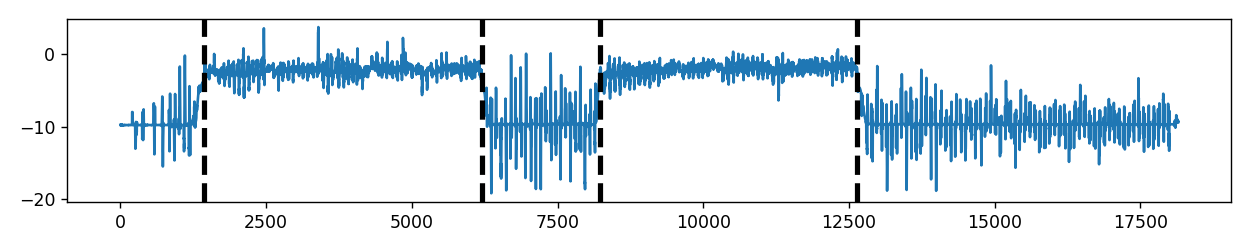

In [7]:
# to find breakpoints for imu data when b_points not available
data = l1
test = data["ax"].rolling(10, min_periods = 1).mean().to_numpy()
new = np.where(test > -3.5, 1, 0)                                  #threshold changes for individuals
algo = rpt.KernelCPD(kernel = 'linear', min_size=100).fit(new)
result = algo.predict(pen = 30)
rpt.display(test, [], result)
plt.show()
result = result[:-1]
bp_l1 = result

In [8]:
bp_l1

[1440, 6200, 8225, 12644]

<IPython.core.display.Javascript object>


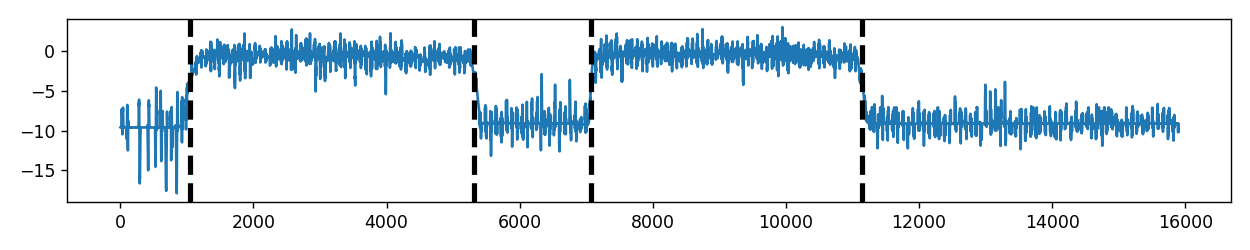

In [9]:
data = r1
test = data["ax"].rolling(10, min_periods = 1).mean().to_numpy()
new = np.where(test > -3.5, 1, 0)                                  #threshold changes for individuals
algo = rpt.KernelCPD(kernel = 'linear', min_size=100).fit(new)
result = algo.predict(pen = 30)
rpt.display(test, [], result)
plt.show()
result = result[:-1]
bp_r1 = result

In [10]:
(bp_r1[1] - bp_r1[0])/30

142.66666666666666

In [11]:
(bp_l1[2] - bp_l1[3])/30

-147.3

In [12]:
fs_r1 = np.mean(np.diff(r1['t'][2:15000])/1000)
fs_r1

0.0

In [13]:
fs_l1 = np.mean(np.diff(l1['t'][2:15000])/1000)
fs_l1

0.029653238647729546

In [14]:
len(r1)/fs_r1

C:\Users\Yash Vardhan Agarwal\AppData\Local\Temp\ipykernel_3840\3938551027.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  len(r1)/fs_r1


inf

In [15]:
len(l1)/fs_l1

612142.2423917882

<IPython.core.display.Javascript object>


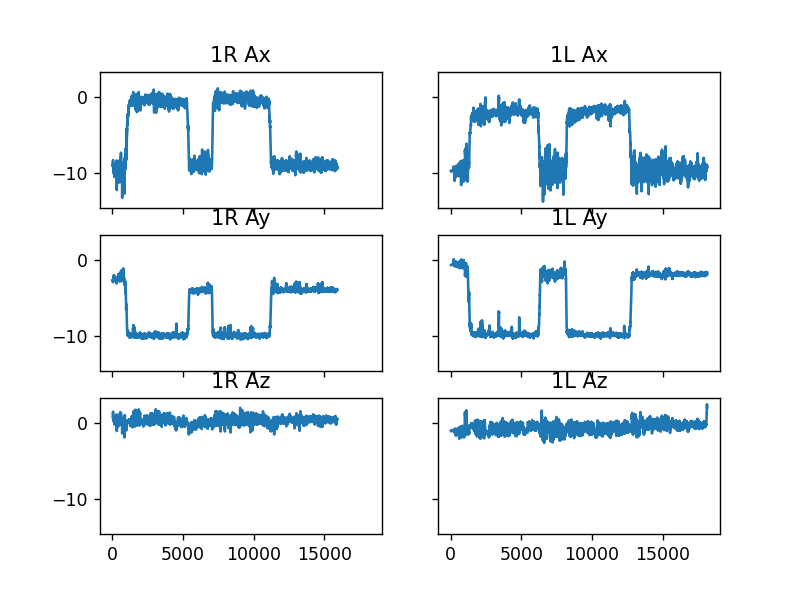

In [16]:
fig, ax = plt.subplots(3,2, sharex=True, sharey=True)
# fig.add_subplot(221)
ax[0,0].set_title('1R Ax')
ax[0,0].plot(r1['ax'].rolling(30).mean())
# fig.add_subplot(222)
ax[1,0].set_title('1R Ay')
ax[1,0].plot(r1['ay'].rolling(30).mean())
# fig.add_subplot(223)
ax[2,0].set_title('1R Az')
ax[2,0].plot(r1['az'].rolling(30).mean())
# fig.add_subplot(224)
ax[0,1].set_title('1L Ax')
ax[0,1].plot(l1['ax'].rolling(30).mean())
# fig.add_subplot(222)
ax[1,1].set_title('1L Ay')
ax[1,1].plot(l1['ay'].rolling(30).mean())
# fig.add_subplot(223)
ax[2,1].set_title('1L Az')
ax[2,1].plot(l1['az'].rolling(30).mean())

In [17]:
bp_r1 

[1040, 5320, 7076, 11142]

In [18]:
bp_l1

[1440, 6200, 8225, 12644]

In [19]:
bp_r1 = list(bp_r1['index'])
bp_l1 = list(bp_l1['index'])

TypeError: list indices must be integers or slices, not str

<IPython.core.display.Javascript object>


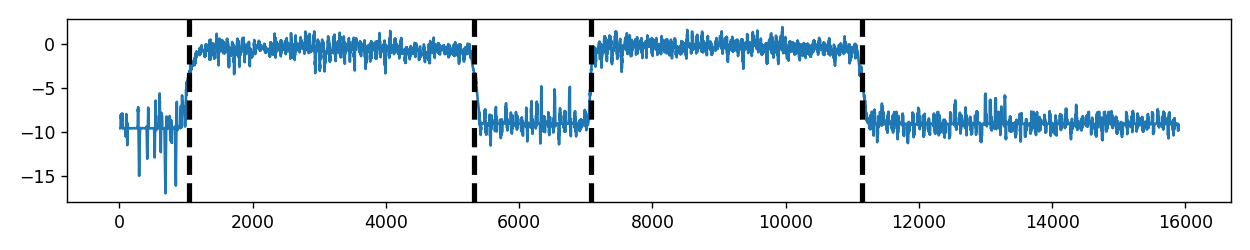

(<Figure size 1000x200 with 1 Axes>, [<AxesSubplot:>])

In [20]:
rpt.display(np.array(r1['ax'].rolling(15).mean()), [], bp_r1)

<IPython.core.display.Javascript object>


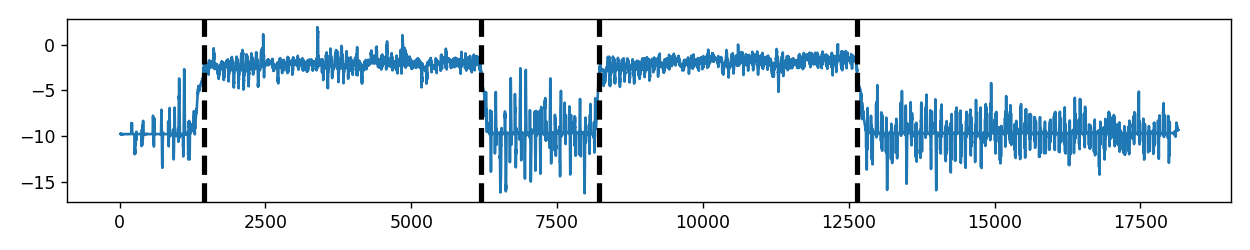

(<Figure size 1000x200 with 1 Axes>, [<AxesSubplot:>])

In [21]:
rpt.display(np.array(l1['ax'].rolling(15).mean()), [], bp_l1)

In [22]:
(bp_r1[1] - bp_r1[0])/30

142.66666666666666

In [23]:
(bp_r1[-1] - bp_r1[-2])/30

135.53333333333333

In [351]:
#second video data corresponds to third segment
d = 884
s = 194

In [352]:
seg_r = r1.iloc[ bp_r1[-2]:bp_r1[-1]+1].copy().reset_index()
seg_l = l1.iloc[ bp_l1[-2]:bp_l1[-1]+1].copy().reset_index()

In [353]:
len(seg_r)

27519

In [354]:
len(seg_l)

29469

In [355]:
#resample to video fps - 29.97 ~ 30
r = 30
n_samples = np.int(d * r)
n_samples

26520

In [356]:
226*30

6780

<IPython.core.display.Javascript object>


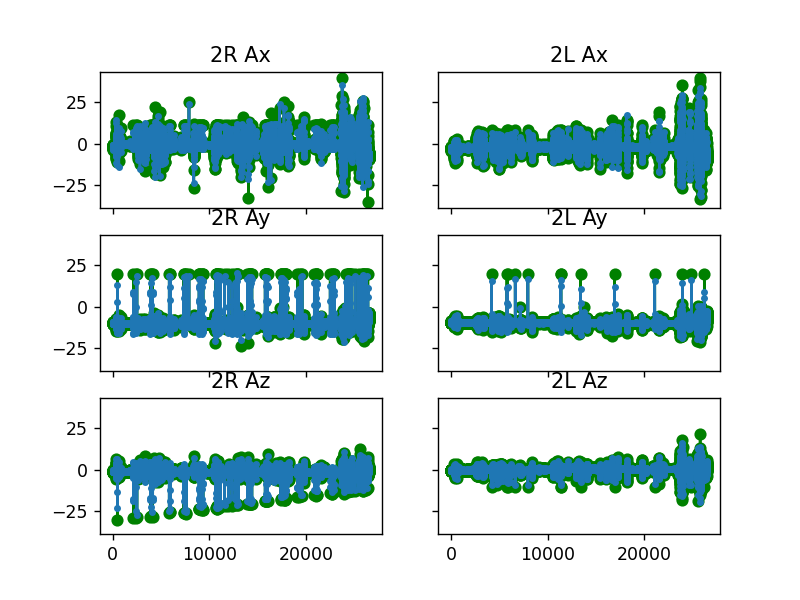

In [357]:
rs_ax_2R = signal.resample(np.array(seg_r['ax']), n_samples)
rs_ay_2R = signal.resample(np.array(seg_r['ay']), n_samples)
rs_az_2R = signal.resample(np.array(seg_r['az']), n_samples)
rs_ax_2L = signal.resample(np.array(seg_l['ax']), n_samples)
rs_ay_2L = signal.resample(np.array(seg_l['ay']), n_samples)
rs_az_2L = signal.resample(np.array(seg_l['az']), n_samples)

x_2R = np.linspace(0,n_samples,len(seg_r['ax']))
x2_2R = np.linspace(0,n_samples,n_samples)
x_2L = np.linspace(0,n_samples,len(seg_l['ax']))
x2_2L = np.linspace(0,n_samples,n_samples)

fig, ax = plt.subplots(3,2, sharex=True, sharey=True)
# fig.add_subplot(221)
ax[0,0].set_title('2R Ax')
ax[0,0].plot(x_2R, seg_r['ax'], 'go-', x2_2R, rs_ax_2R, '.-')
# fig.add_subplot(222)
ax[1,0].set_title('2R Ay')
ax[1,0].plot(x_2R, seg_r['ay'], 'go-', x2_2R, rs_ay_2R, '.-')
# fig.add_subplot(223)
ax[2,0].set_title('2R Az')
ax[2,0].plot(x_2R, seg_r['az'], 'go-', x2_2R, rs_az_2R, '.-')
# fig.add_subplot(224)
ax[0,1].set_title('2L Ax')
ax[0,1].plot(x_2L, seg_l['ax'], 'go-', x2_2L, rs_ax_2L, '.-')
# fig.add_subplot(222)
ax[1,1].set_title('2L Ay')
ax[1,1].plot(x_2L, seg_l['ay'], 'go-', x2_2L, rs_ay_2L, '.-')
# fig.add_subplot(223)
ax[2,1].set_title('2L Az')
ax[2,1].plot(x_2L, seg_l['az'], 'go-', x2_2L, rs_az_2L, '.-')

<IPython.core.display.Javascript object>


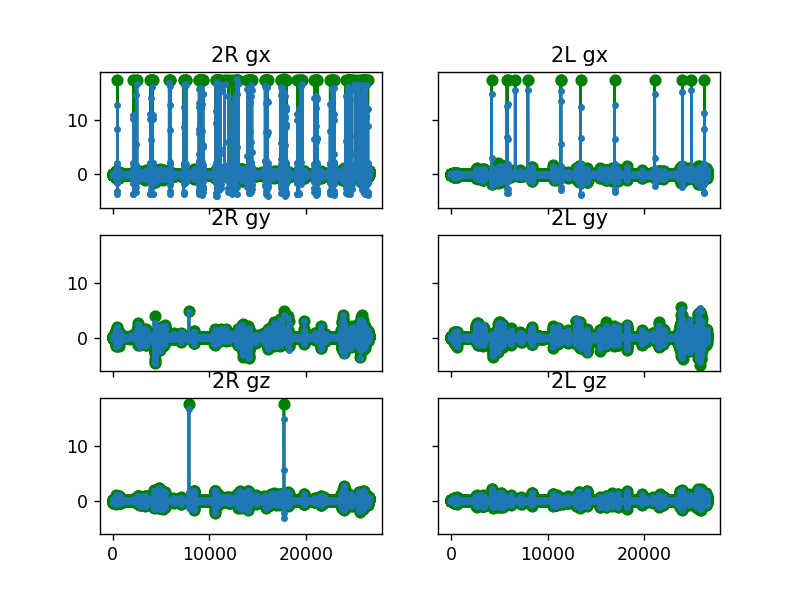

In [358]:
rs_gx_2R = signal.resample(np.array(seg_r['gx']), n_samples)
rs_gy_2R = signal.resample(np.array(seg_r['gy']), n_samples)
rs_gz_2R = signal.resample(np.array(seg_r['gz']), n_samples)
rs_gx_2L = signal.resample(np.array(seg_l['gx']), n_samples)
rs_gy_2L = signal.resample(np.array(seg_l['gy']), n_samples)
rs_gz_2L = signal.resample(np.array(seg_l['gz']), n_samples)

x_2R = np.linspace(0,n_samples,len(seg_r['gx']))
x2_2R = np.linspace(0,n_samples,n_samples)
x_2L = np.linspace(0,n_samples,len(seg_l['gx']))
x2_2L = np.linspace(0,n_samples,n_samples)
# ax[0,0].plot(rs_ax_2R)
# print(np.corrcoef(rs_ax_2R, np.array(d2R['ax'])))

fig, ax = plt.subplots(3,2, sharex=True, sharey=True)
# fig.add_subplot(221)
ax[0,0].set_title('2R gx')
ax[0,0].plot(x_2R, seg_r['gx'], 'go-', x2_2R, rs_gx_2R, '.-')
# fig.add_subplot(222)
ax[1,0].set_title('2R gy')
ax[1,0].plot(x_2R, seg_r['gy'], 'go-', x2_2R, rs_gy_2R, '.-')
# fig.add_subplot(223)
ax[2,0].set_title('2R gz')
ax[2,0].plot(x_2R, seg_r['gz'], 'go-', x2_2R, rs_gz_2R, '.-')
# fig.add_subplot(224)
ax[0,1].set_title('2L gx')
ax[0,1].plot(x_2L, seg_l['gx'], 'go-', x2_2L, rs_gx_2L, '.-')
# fig.add_subplot(222)
ax[1,1].set_title('2L gy')
ax[1,1].plot(x_2L, seg_l['gy'], 'go-', x2_2L, rs_gy_2L, '.-')
# fig.add_subplot(223)
ax[2,1].set_title('2L gz')
ax[2,1].plot(x_2L, seg_l['gz'], 'go-', x2_2L, rs_gz_2L, '.-')

In [359]:
len(rs_ax_2R)

26520

In [360]:
seg_r = r1[['ax','ay','az','gx','gy','gz']]
seg_r = seg_r.iloc[0:n_samples]

In [361]:
seg_l = l1[['ax','ay','az','gx','gy','gz']]
seg_l = seg_l.iloc[0:n_samples]

In [362]:
seg_r['ax'] = rs_ax_2R
seg_r['ay'] = rs_ay_2R
seg_r['az'] = rs_az_2R
seg_r['gx'] = rs_gx_2R
seg_r['gy'] = rs_gy_2R
seg_r['gz'] = rs_gz_2R
seg_l['ax'] = rs_ax_2L
seg_l['ay'] = rs_ay_2L
seg_l['az'] = rs_az_2L
seg_l['gx'] = rs_gx_2L
seg_l['gy'] = rs_gy_2L
seg_l['gz'] = rs_gz_2L

In [363]:
seg_r

,ax,ay,az,gx,gy,gz
0,-2.875793,-9.511084,-0.643321,-0.107789,0.030867,-0.389098
1,-3.311711,-9.315822,-0.691723,-0.024063,-0.030161,-0.351775
2,-3.672748,-9.000083,-0.339512,-0.078518,-0.090362,-0.273037
3,-1.647267,-9.863627,-0.651048,-0.053543,-0.047939,-0.252878
4,-2.611764,-10.002466,-0.574708,-0.029622,0.244046,-0.282587
...,...,...,...,...,...,...
26515,-8.682149,-4.673059,0.871597,0.319605,0.057666,0.168702
26516,-8.885854,-4.840212,0.804396,0.233610,0.136861,0.112547
26517,-9.054544,-4.133837,0.950745,0.393476,0.029789,0.160763
26518,-9.066735,-4.436417,1.831465,0.336894,0.051372,0.191683


In [364]:
#check correlation - find exact points before labeling and scaling
vid = pd.read_csv(file)

def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = vid['right_knee_angle'][(s*30):(s*30)+n_samples]
d2 = pd.Series(seg_r['gz']).rolling(15).mean()
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(10,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,1.0],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);
plt.legend()

KeyError: 'right_knee_angle'

In [128]:
#add offset to reference point
s += int(offset/30)
s

8

In [365]:
labels = pd.read_excel('D:\\LifeSpark Technology\\Gait Data\\review videos\\HR Pandit.xlsx')

In [366]:
labels

,HR PANDIT,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WITHOUT BAND,NaN,NaN,PLACEBO,NaN,NaN,WITH BAND,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10m test,NaN,NaN,maze analysis,NaN,NaN,maze analysis,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Test 1 (DJI 0167),1 min 5 sec,NaN,DJI 0170,NaN,NaN,DJI 0174,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.09- 1-.58,freez 49 sec,NaN,3.14-4.38,freez 1min 24 sec,NaN,0.04-0.22,freez 18 sec
8,NaN,NaN,NaN,4.39-4.55,turn clkwise 90 degree,NaN,0.24-0.42,freez 18 sec
9,Test 2 (DJI 0167),5 min,NaN,4.55-5.00,freez 5 sec,NaN,2.52-3.15,freez 23 sec


In [367]:
labels.columns = list('abcdefgh')

In [368]:
#check which column data required

a = labels['d'][7:38].to_list()
b = labels['e'][7:38].to_list()

In [369]:
a

['3.14-4.38',
 '4.39-4.55',
 '4.55-5.00',
 '5.01-5.09',
 '5.10-5.33',
 '6.14-7.06',
 '7.07-7.50',
 7.51,
 '7.55-9.04',
 '9.07-10.23',
 '10.26-10.31',
 '10.45-11.00',
 '11.05-11.46',
 '11.47-12.07',
 '12.07-12.11',
 '12.11-12.17',
 '12.32-12.34',
 '12.50-13.18',
 '13.22-14.12',
 '14.13-15.10',
 15.11,
 '15.12-15.14',
 '15.15-15.29',
 '15.19-16.20',
 '16.34-17.21',
 nan,
 '5.55-5.58',
 '5.59-6.03',
 '6.08-6.14',
 '9.18-10.39',
 '10.43-11.08']

In [370]:
b

['freez 1min 24 sec',
 'turn clkwise 90 degree',
 'freez 5 sec',
 'walk backwards',
 'help for maze start',
 'freez 52 sec',
 'freez 43 sec',
 'help',
 'freez 1 min 9 sec',
 'freez 1min 16 sec',
 'freez 5 sec',
 'freez 15 sec',
 'freez 41 sec',
 'shoes off',
 'walk backwards',
 'freez 6 sec',
 'freez 2 swc',
 'freez 28 sec',
 'freez 50 sec',
 'freez 57 sec',
 'imbalance',
 'walk backwards',
 'freez 14 sec',
 'freez 1 min 1 sec',
 '47 sec',
 nan,
 'turn 3 sec',
 'turn 4 sec',
 'turn 6 sec',
 'turn 1 min 21 sec',
 'turn 25 sec']

In [381]:
freezing = []
turning = []

for i in range(len(a)):
    if type(b[i])==str and len(b[i])>=4:
        if b[i][0:4]=='turn':
            turning.append(str(a[i]))
        elif b[i][0:3]=='fre' or b[i][0:3]=='dyn' or b[i][0:3]=='wal' or b[i][0:3]=='47 ':
            freezing.append(str(a[i]))

In [387]:
freezing

[[0, 84],
 [101, 106],
 [107, 115],
 [180, 232],
 [233, 276],
 [281, 350],
 [353, 429],
 [432, 437],
 [451, 466],
 [471, 512],
 [533, 537],
 [537, 543],
 [558, 560],
 [576, 604],
 [608, 658],
 [659, 716],
 [718, 720],
 [721, 735],
 [725, 786],
 [800, 847]]

In [383]:
len(freezing)

20

In [384]:
freezing = [i.split('-') for i in freezing]
turning = [i.split('-') for i in turning]

In [289]:
freezing[8][1] = '17.52'

In [380]:
turning

[[85, 101], [161, 164], [165, 169], [174, 180], [364, 445], [449, 474]]

In [99]:
turning[15][1] = '3.09'

In [385]:
def tosec(t,rp):
    t = t.split('.')
    m = int(t[0])
    if len(t)>1:
        if len(t[1])>1:
            s = int(t[1][0:2])
        else:
            s = int(t[1])*10
    else:
        s=0
    #print (t, m,s)
    s += (60*m) 
    #00.07-> ref point 1
    if (s>=rp):
        s=s-rp
    return s

In [386]:
freezing = [[tosec(t,s) for t in cs] for cs in freezing]
turning = [[tosec(t,s) for t in cs] for cs in turning]

In [388]:
fs_r_1 =len(seg_r)/d
fs_r_1

30.0

In [389]:
fs_l_1 = len(seg_l)/d
fs_l_1

30.0

In [390]:
f_r1 = np.zeros(len(seg_r))
                
for i in freezing:
    f_r1[int(i[0]*fs_r_1):int(i[1]*fs_r_1)] = 1

t_r1 = np.zeros((len(seg_r)))
for i in turning:
    t_r1[int(i[0]*fs_r_1):int(i[1]*fs_r_1)] = 1

<IPython.core.display.Javascript object>


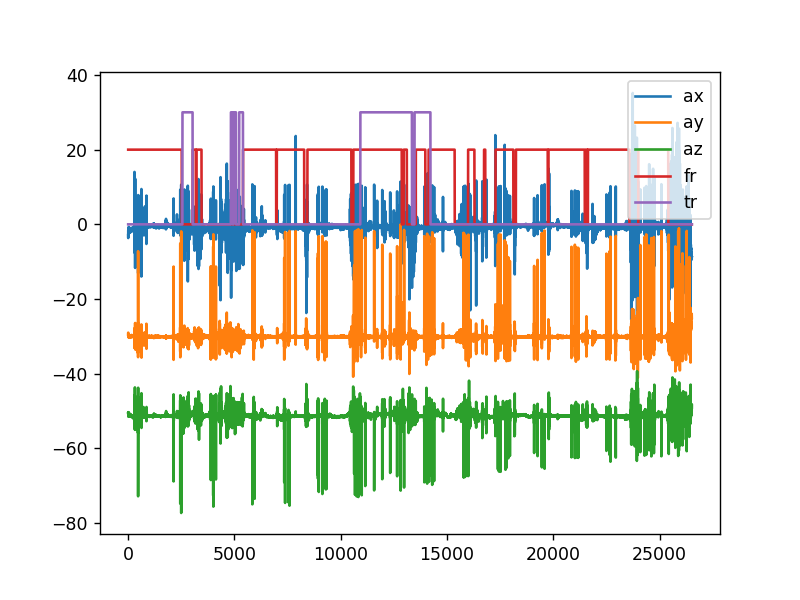

In [391]:
plt.figure()
plt.plot(seg_r['ax'])
plt.plot(seg_r['ay']-20)
plt.plot(seg_r['az']-50)
plt.plot(f_r1*20)
plt.plot(t_r1*30)
plt.legend(['ax','ay','az','fr','tr'])

In [392]:
seg_r['freezing'] = f_r1
seg_r['turning'] = t_r1

In [393]:
seg_r

,ax,ay,az,gx,gy,gz,freezing,turning
0,-2.875793,-9.511084,-0.643321,-0.107789,0.030867,-0.389098,1.0,0.0
1,-3.311711,-9.315822,-0.691723,-0.024063,-0.030161,-0.351775,1.0,0.0
2,-3.672748,-9.000083,-0.339512,-0.078518,-0.090362,-0.273037,1.0,0.0
3,-1.647267,-9.863627,-0.651048,-0.053543,-0.047939,-0.252878,1.0,0.0
4,-2.611764,-10.002466,-0.574708,-0.029622,0.244046,-0.282587,1.0,0.0
...,...,...,...,...,...,...,...,...
26515,-8.682149,-4.673059,0.871597,0.319605,0.057666,0.168702,0.0,0.0
26516,-8.885854,-4.840212,0.804396,0.233610,0.136861,0.112547,0.0,0.0
26517,-9.054544,-4.133837,0.950745,0.393476,0.029789,0.160763,0.0,0.0
26518,-9.066735,-4.436417,1.831465,0.336894,0.051372,0.191683,0.0,0.0


In [394]:
f_l1 = np.zeros(len(seg_l))
                
for i in freezing:
    f_l1[int(i[0]*fs_l_1):int(i[1]*fs_l_1)] = 1

t_l1 = np.zeros((len(seg_l)))
for i in turning:
    t_l1[int(i[0]*fs_l_1):int(i[1]*fs_l_1)] = 1

<IPython.core.display.Javascript object>


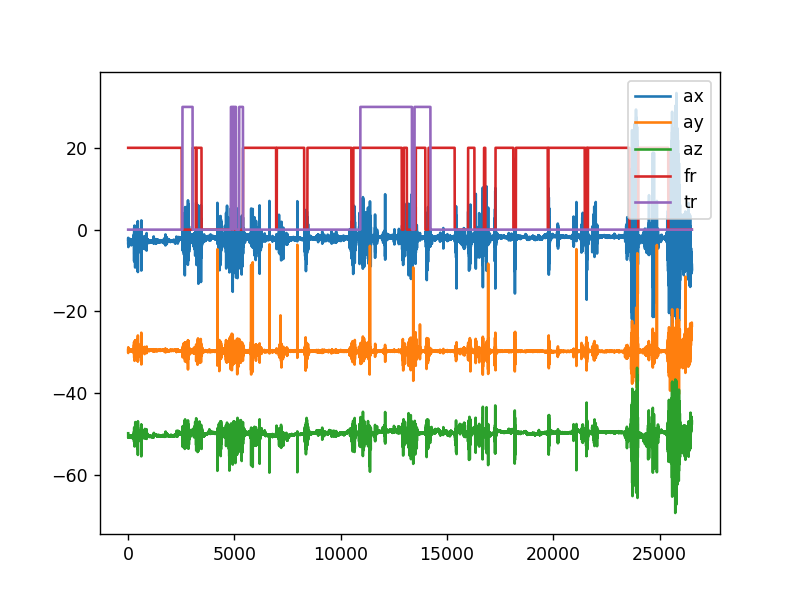

In [395]:
plt.figure()
plt.plot(seg_l['ax'])
plt.plot(seg_l['ay']-20)
plt.plot(seg_l['az']-50)
plt.plot(f_l1*20)
plt.plot(t_l1*30)
plt.legend(['ax','ay','az','fr','tr'])

In [396]:
seg_l['freezing'] = f_l1
seg_l['turning'] = t_l1

In [397]:
seg_r

,ax,ay,az,gx,gy,gz,freezing,turning
0,-2.875793,-9.511084,-0.643321,-0.107789,0.030867,-0.389098,1.0,0.0
1,-3.311711,-9.315822,-0.691723,-0.024063,-0.030161,-0.351775,1.0,0.0
2,-3.672748,-9.000083,-0.339512,-0.078518,-0.090362,-0.273037,1.0,0.0
3,-1.647267,-9.863627,-0.651048,-0.053543,-0.047939,-0.252878,1.0,0.0
4,-2.611764,-10.002466,-0.574708,-0.029622,0.244046,-0.282587,1.0,0.0
...,...,...,...,...,...,...,...,...
26515,-8.682149,-4.673059,0.871597,0.319605,0.057666,0.168702,0.0,0.0
26516,-8.885854,-4.840212,0.804396,0.233610,0.136861,0.112547,0.0,0.0
26517,-9.054544,-4.133837,0.950745,0.393476,0.029789,0.160763,0.0,0.0
26518,-9.066735,-4.436417,1.831465,0.336894,0.051372,0.191683,0.0,0.0


In [331]:
seg_r_2 = pd.concat([seg_r,seg_r_1],axis = 0)
seg_l_2 = pd.concat([seg_l,seg_l_1], axis = 0)

In [332]:
seg_r_2

,ax,ay,az,gx,gy,gz,freezing,turning
0,-1.330000,-10.090000,0.950000,-0.270000,-0.160000,-0.570000,0.0,0.0
1,-4.153789,-10.461107,4.370961,-0.024783,0.406991,0.010499,0.0,0.0
2,-3.699668,-10.406093,3.713956,0.168430,-0.120649,0.051220,0.0,0.0
3,-2.414441,-9.330803,0.634361,0.237916,-0.072684,-0.208047,0.0,0.0
4,-6.879706,-9.418483,-0.195637,0.055184,-0.145007,-0.054653,0.0,0.0
...,...,...,...,...,...,...,...,...
10255,-3.551610,-9.633974,-0.002049,-0.051065,-0.094117,0.328053,0.0,0.0
10256,-3.386074,-9.495057,-0.042409,0.020067,0.049493,0.332953,0.0,0.0
10257,-3.932661,-9.364239,0.024077,0.063226,0.140955,0.368914,0.0,0.0
10258,-3.519474,-9.285270,-0.969594,0.000892,0.066988,0.436362,0.0,0.0


In [398]:
import os
path = os.getcwd()
path = os.path.join(path,'labelled(RL2)')

os.makedirs(os.path.join(path,'HRP'))

In [399]:
seg_r.to_csv('D:\LifeSpark Technology\labelled(RL2)\HRP\\r2_seg.csv')
seg_l.to_csv('D:\LifeSpark Technology\labelled(RL2)\HRP\\l2_seg.csv')